# Import data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [82]:
df = pd.read_csv('/home/song/Public/Song/Work/Thesis/data/water.csv',index_col=['date_time'],parse_dates=['date_time'])

In [83]:
# Select stations

filepath = ("../hii-telemetering-batch-data-master/")
water_st = pd.read_csv(filepath+"station_metadata-water-level.csv")
water_st = water_st.loc[(water_st['basin']=="แม่น้ำปิง")|(water_st['basin']=="แม่น้ำเจ้าพระยา")|(water_st['basin']=="แม่น้ำน่าน")]

def intersection(lst1, lst2): 
    return list(set(lst1) & set(lst2)) 
col = [i for i in water_st['code']]
#เช็คว่า ชื่อสถานีมีอยู่ในDBจริงก่อนใช้
col = intersection(col,df.columns)

In [84]:
df = df[col]
df = df.resample('d').mean()
df.head()

,BKK002,CPY001,LBI002,NAN011,LBI001,VLGE12,NAN008,PIN006,BKK007,NAN003,...,CPY014,HDA005,NAN012,CPY008,TBW014,PIN002,CHM006,TB0006,PIN001,CHM001
date_time,,,,,,,,,,,,,,,,,,,,,
2012-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
df = df["2013-01-01":"2015-01-01"].interpolate(method='pad', limit=10) # selected period, interporlation missing value
df.dropna(axis=1,inplace=True) # drop na stations 
print(df.shape)
df.head()


(731, 70)


,LBI002,NAN011,LBI001,VLGE12,NAN008,PIN006,BKK007,NAN003,CPY006,BKK005,...,CPY014,HDA005,NAN012,CPY008,TBW014,PIN002,CHM006,TB0006,PIN001,CHM001
date_time,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1.517972,1.517972,0.924167,33.686783,19.981399,19.981399,0.773264,189.849394,3.484545,0.362378,...,0.829301,0.829301,0.829301,0.676042,0.676042,100.316736,100.316736,100.316736,119.359161,314.991888
2013-01-02,1.497083,1.497083,0.797500,33.538531,20.007532,20.007532,0.666181,189.844268,3.482708,0.375944,...,0.692292,0.692292,0.692292,0.569097,0.569097,100.191978,100.191978,100.191978,119.383333,315.007361
2013-01-03,1.544583,1.544583,0.771528,33.499510,20.144236,20.144236,0.612222,189.841888,3.471111,0.348951,...,0.636667,0.636667,0.636667,0.549653,0.549653,100.487813,100.487813,100.487813,119.499650,315.000000
2013-01-04,1.549722,1.549722,0.681736,33.500839,20.090625,20.090625,0.535625,189.839441,3.445625,0.316014,...,0.565833,0.565833,0.565833,0.455833,0.455833,100.500903,100.500903,100.500903,119.406434,314.968611
2013-01-05,1.349790,1.349790,0.689375,33.471888,20.078681,20.078681,0.527361,189.842727,3.443611,0.314196,...,0.573889,0.573889,0.573889,0.441181,0.441181,100.494444,100.494444,100.494444,119.403287,314.933819


# LSTM

In [133]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, GRU

from sklearn.preprocessing import MinMaxScaler

In [109]:
timelag = 7
y = df['CPY014'].shift(-timelag)

In [110]:

print("********RAIN_BEFORE********")
print("Min: ", np.min(df))
print("Max: ", np.max(df))
print("********RAIN_AFTER********")
scaler = MinMaxScaler()
scaler_df = scaler.fit_transform(df)
print("Min: ", np.min(scaler_df))
print("Max: ", np.max(scaler_df))

********RAIN_BEFORE********
Min:  LBI002      0.462246
NAN011      1.217917
LBI001      0.010000
VLGE12      0.603333
NAN008     17.938239
PIN006     18.880000
BKK007      0.036782
NAN003      0.227708
CPY006      3.079097
BKK005      0.002517
NAN009      0.186597
CPY016      0.242378
BKK003      0.257407
TB0001      0.257407
BKK018      0.371111
CPY012      0.159559
CPY013     -0.422857
CPY009     -0.013059
NAN004      0.068252
BKK021      0.756181
THA001      1.207431
PIN003     13.835903
DIV005     13.835903
NAN010     82.449021
CHM005     82.505490
CPY002     12.752500
PIN004     39.427986
NAN014     39.815347
GLF001      0.513628
BKK019      0.618819
             ...    
BKK001     -0.379306
TB0004     -0.379306
BKK004     -0.379306
CPY010      0.070000
NAN007      0.365175
KWN002      0.514722
CPY011      0.180875
BKK020     -0.331189
THA002     -0.305556
NAN006      0.099583
HDA004      0.099583
NAN005     33.544167
CPY017     -0.009923
BKK013      0.994444
CHM002      1.545278


In [111]:
X = df.values[:-timelag]
print(type(X))
print("Shape:",X.shape)
print("*"*20)

y = y.values[:-timelag]
y = y.reshape(-1,1)
print(type(y))
print("Shape:", y.shape)

<class 'numpy.ndarray'>
Shape: (724, 70)
********************
<class 'numpy.ndarray'>
Shape: (724, 1)


In [121]:
num_data = len(X)
train_split = 0.8 #8:2 train:test

num_train = int(train_split*num_data)
num_test = num_data-num_train

print("Total data From..",num_data)
print("Train:",num_train,", Test:",num_test)

######################################
x_train = X[0:num_train]
x_test = X[num_train:]

y_train = y[0:num_train]
y_test = y[num_train:]

num_x_feature = X.shape[1]
#num_y_feature = y.shape[1]
num_y_feature = y.shape[1]
######################################
print('='*30)
print("x_train shape",x_train.shape)
print("y_train shape",y_train.shape)
print("x feature....",num_x_feature)
print("y feature....",num_y_feature)

Total data From.. 724
Train: 579 , Test: 145
x_train shape (579, 70)
y_train shape (579, 1)
x feature.... 70
y feature.... 1


In [114]:
def batch_gen(batch_size, sequence_length):
    while True:
        x_shape = (batch_size, sequence_length, num_x_feature)
        x_batch = np.zeros(shape = x_shape, dtype=np.float16)
        
        y_shape = (batch_size, sequence_length, num_y_feature)
        y_batch = np.zeros(shape = y_shape, dtype=np.float16)
        
        #fill batch with random sequences of data
        for i in range(batch_size):
            
            #Get rand start index,
            idx = np.random.randint(num_train - sequence_length)
            
            #copy sequence of data start at this index.
            x_batch[i] = x_train[idx:idx+sequence_length]
            y_batch[i] = y_train[idx:idx+sequence_length]
            
        yield (x_batch, y_batch)       

In [125]:
batch_size = 256
sequence_length = timelag

generator = batch_gen(batch_size=batch_size,
                            sequence_length=sequence_length)

x_batch, y_batch = next(generator)

print(x_batch.shape)
print(y_batch.shape)

(256, 7, 70)
(256, 7, 1)


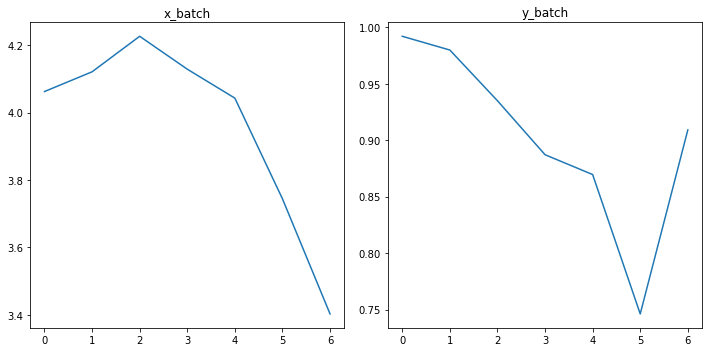

In [129]:
batch = 10  # First sequence in the batch.
signal = 0  # First signal from the 20 input-signals.
seq = x_batch[batch, :, signal]
seq2 = y_batch[batch, :, signal]


fig,ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(seq)
ax[0].set_title("x_batch")
ax[1].plot(seq2)
ax[1].set_title("y_batch")
fig.tight_layout() 


In [126]:
validation_data = (np.expand_dims(x_test, axis=0),np.expand_dims(y_test, axis=0))

print("x_test shape:",validation_data[0].shape)
print("y_test shape:",validation_data[1].shape)

x_test shape: (1, 145, 70)
y_test shape: (1, 145, 1)


In [134]:
model = Sequential()
model.add(GRU(128, return_sequences=True, input_shape=(None,num_x_feature),
              activation='relu'))
model.add(GRU(128,return_sequences=True))
model.add(Dense(num_y_feature,activation='relu'))
opt = tf.keras.optimizers.Adam(lr=1e-3,decay=1e-5)

model.compile(optimizer=opt, loss='mse', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, None, 128)         76800     
_________________________________________________________________
gru_1 (GRU)                  (None, None, 128)         99072     
_________________________________________________________________
dense_5 (Dense)              (None, None, 1)           129       
Total params: 176,001
Trainable params: 176,001
Non-trainable params: 0
_________________________________________________________________


In [136]:
history = model.fit(x=generator,
          epochs=10,
          steps_per_epoch=100)

Train for 100 steps
Epoch 1/10
  1/100 [..............................] - ETA: 2s

UnknownError:  [_Derived_]  Fail to find the dnn implementation.
	 [[{{node CudnnRNN}}]]
	 [[sequential_6/gru_1/StatefulPartitionedCall]] [Op:__inference_distributed_function_29712]

Function call stack:
distributed_function -> distributed_function -> distributed_function


In [132]:
tf.__version__


'2.0.0'